# Music Recommendation System

About: train.csv contains 6 attributes.
Attribute Information:

> 1.msno: user id

> 2.song_id: song id

> 3.source_system_tab: the name of the tab where the event was triggered

> 4.source_screen_name: name of the layout a user sees

> 5.source_type: an entry point a user first plays music on mobile apps.

> 6.target: target=1 means the song has been heard multiple times, target=0 otherwise

About: test.csv contains 5 attributes.
Attribute Information:

> 1.msno: user id

> 2.song_id: song id

> 3.source_system_tab: the name of the tab where the event was triggered

> 4.source_screen_name: name of the layout a user sees

> 5.source_type: an entry point a user first plays music on mobile apps.

About: songs.csv contains 3 attributes.
Attribute Information:

> 1.song_id: song id

> 2.song_length: in ms

> 3.genre_ids: genre category

About: members.csv contains 8 attributes.
Attribute Information:

> 1.msno 

> 2.city 

> 3.bd

> 4.age

> 5.gender 

> 6.registered_via: registration method 

> 7.registration_init_time: format %Y%m%d 

> 8.expiration_date: format %Y%m%d

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import missingno as msno
os.chdir("C:\\Users\\Basudev\\Downloads\\Music_Recommendation")

DATASET

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
songs = pd.read_csv('songs.csv')
members = pd.read_csv('members.csv')

In [3]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [4]:
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52


In [5]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   msno                19999 non-null  object
 1   song_id             19999 non-null  object
 2   source_system_tab   19932 non-null  object
 3   source_screen_name  19423 non-null  object
 4   source_type         19949 non-null  object
 5   target              19999 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 937.6+ KB


In [7]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39999 entries, 0 to 39998
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   song_id      39999 non-null  object
 1   song_length  39999 non-null  int64 
 2   genre_ids    39282 non-null  object
 3   artist_name  39999 non-null  object
 4   composer     23203 non-null  object
 5   lyricist     10913 non-null  object
 6   language     39999 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 2.1+ MB


In [8]:
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   msno                    34403 non-null  object
 1   city                    34403 non-null  int64 
 2   bd                      34403 non-null  int64 
 3   gender                  14501 non-null  object
 4   registered_via          34403 non-null  int64 
 5   registration_init_time  34403 non-null  int64 
 6   expiration_date         34403 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.8+ MB


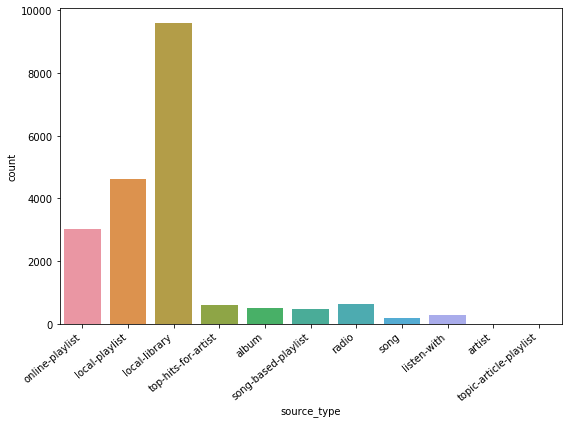

In [9]:
plt.figure(figsize = (8,6))
ax = sns.countplot(x = 'source_type', data = train)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = 'right')
plt.tight_layout()
plt.show()

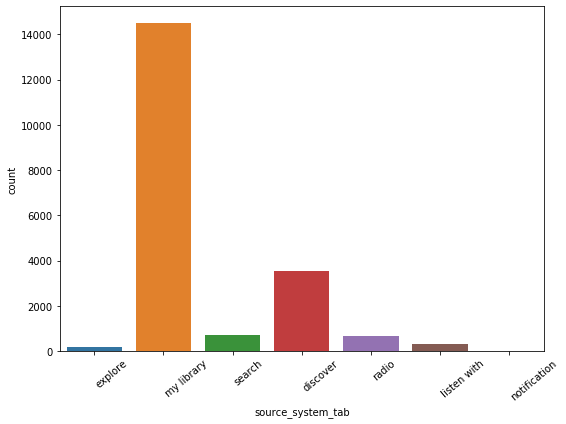

In [10]:
plt.figure(figsize = (8,6))
ax = sns.countplot(x = 'source_system_tab', data = train)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = 'left')
plt.tight_layout()
plt.show()

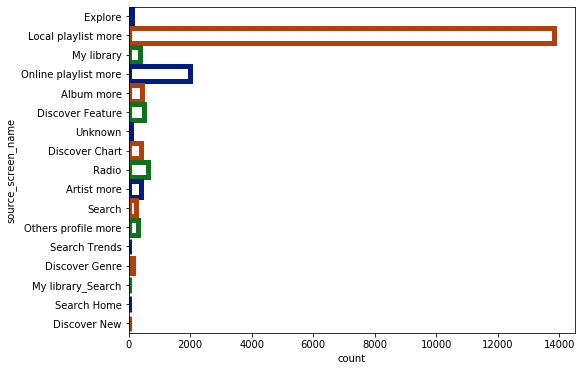

In [11]:
plt.figure(figsize = (8,6))
ax = sns.countplot(y = train['source_screen_name'],
                  data = train,
                  facecolor = (0, 0, 0, 0),
                  linewidth = 5,
                  edgecolor = sns.color_palette('dark', 3))
plt.show()

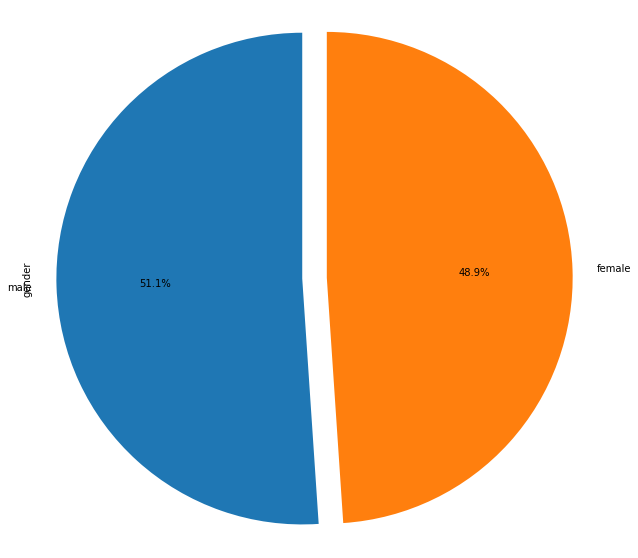

In [12]:
plt.figure(figsize = (10, 10))
pp = pd.value_counts(members.gender)
pp.plot.pie(startangle = 90, autopct = '%1.1f%%', shadow = False, explode = (0.05, 0.05))
plt.axis('equal')
plt.show()

In [13]:
#Merging Datasets

#Train Set
train_members = pd.merge(train, members, on = 'msno', how = 'inner')
train_merged = pd.merge(train_members, songs, on = 'song_id', how = 'outer')
print(train_merged.head())
print(len(train_merged.columns))
print("\n")

                                           msno  \
0  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
1  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
2  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
3  hZyOA+0yqClPLt6uIEndf8fG8szH/95eKMbaxLE5z30=   
4  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   

                                        song_id source_system_tab  \
0  BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=           explore   
1  3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=           explore   
2  3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=           explore   
3  3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=          discover   
4  bPIvRTzfHxH5LgHrStll+tYwSQNVV8PySgA3M1PfTgc=           explore   

  source_screen_name      source_type  target  city    bd gender  \
0            Explore  online-playlist     1.0   1.0   0.0    NaN   
1            Explore  online-playlist     1.0   1.0   0.0    NaN   
2            Explore  online-playlist     1.0   1.0   0.0    NaN   
3     

In [14]:
#Test Set
test_members = pd.merge(test, members, on = 'msno', how = 'inner')
test_merged = pd.merge(test_members, songs, on = 'song_id', how = 'outer')
print(train_merged.head())
print(len(test_merged.columns))
print(train_merged.columns.to_series().groupby(train_merged.dtypes).groups)
print(test_merged.columns.to_series().groupby(test_merged.dtypes).groups)

                                           msno  \
0  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
1  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
2  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
3  hZyOA+0yqClPLt6uIEndf8fG8szH/95eKMbaxLE5z30=   
4  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   

                                        song_id source_system_tab  \
0  BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=           explore   
1  3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=           explore   
2  3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=           explore   
3  3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=          discover   
4  bPIvRTzfHxH5LgHrStll+tYwSQNVV8PySgA3M1PfTgc=           explore   

  source_screen_name      source_type  target  city    bd gender  \
0            Explore  online-playlist     1.0   1.0   0.0    NaN   
1            Explore  online-playlist     1.0   1.0   0.0    NaN   
2            Explore  online-playlist     1.0   1.0   0.0    NaN   
3     

In [15]:
#Check for Missing Values
def check_missing_values(df):
    print(df.isnull().values.any())
    if(df.isnull().values.any() == True):
        columns_with_Nan = df.columns[df.isnull().any()].tolist()
        print(columns_with_Nan)
        for col in columns_with_Nan:
            print('%s : %d'%(col, df[col].isnull().sum()))

In [16]:
check_missing_values(train_merged)

True
['msno', 'source_system_tab', 'source_screen_name', 'source_type', 'target', 'city', 'bd', 'gender', 'registered_via', 'registration_init_time', 'expiration_date', 'song_length', 'genre_ids', 'artist_name', 'composer', 'lyricist', 'language']
msno : 38665
source_system_tab : 38732
source_screen_name : 39241
source_type : 38715
target : 38665
city : 38665
bd : 38665
gender : 46377
registered_via : 38665
registration_init_time : 38665
expiration_date : 38665
song_length : 17154
genre_ids : 17895
artist_name : 17154
composer : 34148
lyricist : 46653
language : 17154


In [17]:
check_missing_values(test_merged)

True
['id', 'msno', 'source_system_tab', 'source_screen_name', 'source_type', 'city', 'bd', 'gender', 'registered_via', 'registration_init_time', 'expiration_date', 'song_length', 'genre_ids', 'artist_name', 'composer', 'lyricist', 'language']
id : 39524
msno : 39524
source_system_tab : 39527
source_screen_name : 39742
source_type : 39526
city : 39524
bd : 39524
gender : 41665
registered_via : 39524
registration_init_time : 39524
expiration_date : 39524
song_length : 4298
genre_ids : 5017
artist_name : 4298
composer : 21113
lyricist : 33461
language : 4298


In [18]:
#Replace Missing Float Values with -5
def replace_Nan_non_object(df):
    object_cols = list(df.select_dtypes(include = ['float']).columns)
    for col in object_cols:
        df[col] = df[col].fillna(np.int(-5))

In [19]:
replace_Nan_non_object(train_merged)

In [20]:
replace_Nan_non_object(test_merged)

In [21]:
#Missing Values of Object Type
def replace_Nan_object(df):
    object_cols = list(df.select_dtypes(include = ['object']).columns)
    for col in object_cols:
        df[col] = df[col].fillna(' ')
    print(object_cols)

In [22]:
replace_Nan_object(train_merged)

['msno', 'song_id', 'source_system_tab', 'source_screen_name', 'source_type', 'gender', 'genre_ids', 'artist_name', 'composer', 'lyricist']


In [23]:
replace_Nan_object(test_merged)

['msno', 'song_id', 'source_system_tab', 'source_screen_name', 'source_type', 'gender', 'genre_ids', 'artist_name', 'composer', 'lyricist']


VISUALIZATION

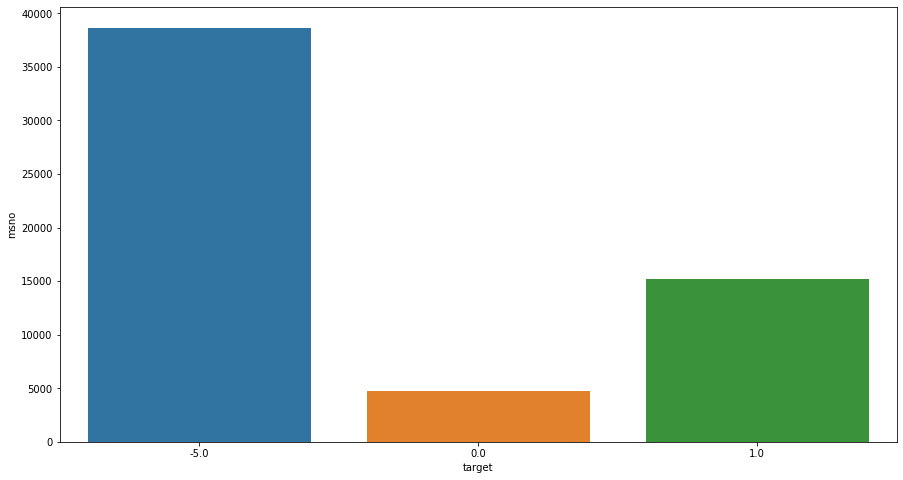

In [24]:
data = train_merged.groupby('target').aggregate({'msno' : 'count'}).reset_index()
a4_dims = (15, 8)
fig, ax = plt.subplots(figsize = a4_dims)
ax = sns.barplot(x = 'target', y = 'msno', data = data)

In [25]:
train_merged = train_merged[train_merged.target != -5]
len(train_merged.index)

19999

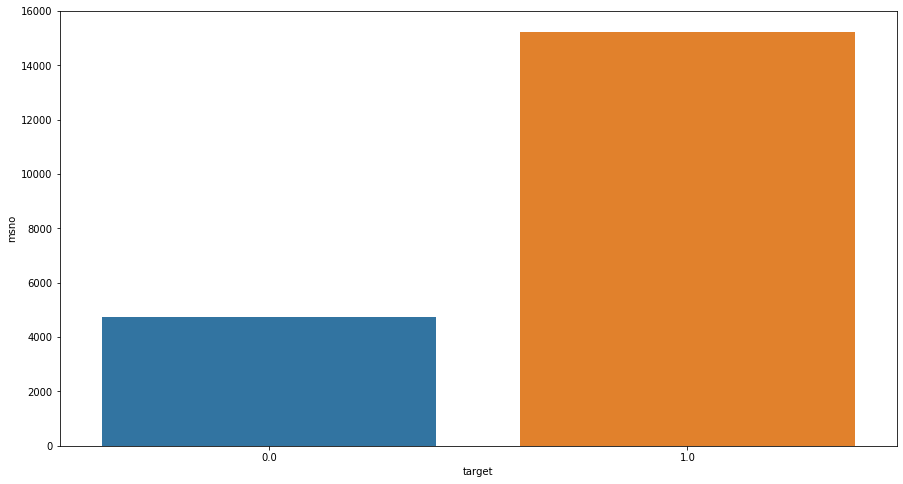

In [26]:
data = train_merged.groupby('target').aggregate({'msno' : 'count'}).reset_index()
a4_dims = (15, 8)
fig, ax = plt.subplots(figsize = a4_dims)
ax = sns.barplot(x = 'target', y = 'msno', data = data)

[Text(0, 0, '-5.0'),
 Text(0, 0, '-1.0'),
 Text(0, 0, '3.0'),
 Text(0, 0, '10.0'),
 Text(0, 0, '17.0'),
 Text(0, 0, '24.0'),
 Text(0, 0, '31.0'),
 Text(0, 0, '52.0'),
 Text(0, 0, '59.0')]

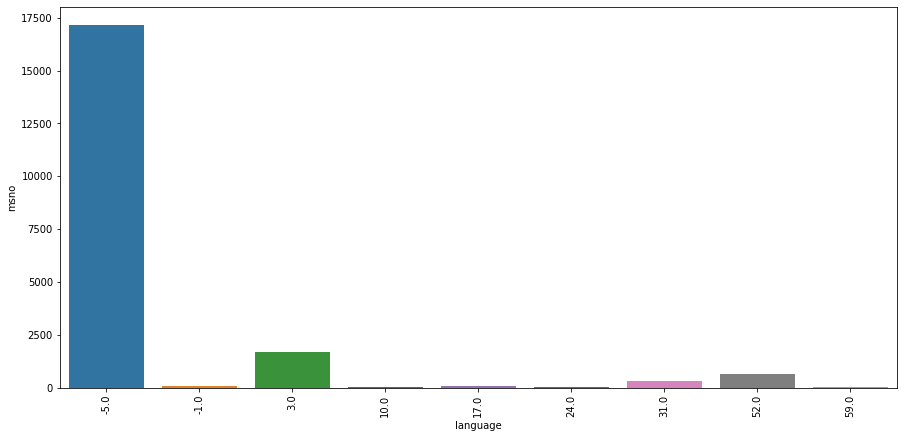

In [27]:
data = train_merged.groupby('language').aggregate({'msno' : 'count'}).reset_index()
a4_dims = (15, 7)
fig, ax = plt.subplots(figsize = a4_dims)
ax = sns.barplot(x = 'language', y = 'msno', data = data)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

[Text(0, 0, '1.0'),
 Text(0, 0, '3.0'),
 Text(0, 0, '4.0'),
 Text(0, 0, '5.0'),
 Text(0, 0, '6.0'),
 Text(0, 0, '7.0'),
 Text(0, 0, '8.0'),
 Text(0, 0, '9.0'),
 Text(0, 0, '10.0'),
 Text(0, 0, '11.0'),
 Text(0, 0, '12.0'),
 Text(0, 0, '13.0'),
 Text(0, 0, '14.0'),
 Text(0, 0, '15.0'),
 Text(0, 0, '16.0'),
 Text(0, 0, '17.0'),
 Text(0, 0, '18.0'),
 Text(0, 0, '20.0'),
 Text(0, 0, '21.0'),
 Text(0, 0, '22.0')]

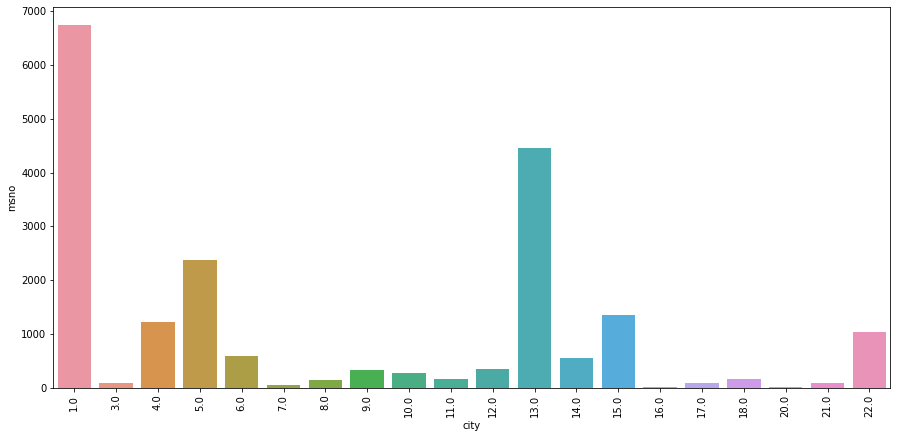

In [28]:
data = train_merged.groupby('city').aggregate({'msno' : 'count'}).reset_index()
a4_dims = (15, 7)
fig, ax = plt.subplots(figsize = a4_dims)
ax = sns.barplot(x = 'city', y = 'msno', data = data)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

In [29]:
df = pd.read_csv('train.csv')
df = df.sample(frac = 0.1)
songs = pd.read_csv('songs.csv')
members = pd.read_csv('members.csv')

In [30]:
df = pd.merge(df, songs, on = 'song_id', how = 'left')
df = pd.merge(df, members, on = 'msno', how = 'left')

In [31]:
del songs

In [32]:
del members

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   msno                    2000 non-null   object 
 1   song_id                 2000 non-null   object 
 2   source_system_tab       1995 non-null   object 
 3   source_screen_name      1938 non-null   object 
 4   source_type             1997 non-null   object 
 5   target                  2000 non-null   int64  
 6   song_length             299 non-null    float64
 7   genre_ids               295 non-null    object 
 8   artist_name             299 non-null    object 
 9   composer                247 non-null    object 
 10  lyricist                195 non-null    object 
 11  language                299 non-null    float64
 12  city                    2000 non-null   int64  
 13  bd                      2000 non-null   int64  
 14  gender                  1186 non-null   

In [34]:
df.isnull().sum() / df.isnull().count() * 100

msno                       0.00
song_id                    0.00
source_system_tab          0.25
source_screen_name         3.10
source_type                0.15
target                     0.00
song_length               85.05
genre_ids                 85.25
artist_name               85.05
composer                  87.65
lyricist                  90.25
language                  85.05
city                       0.00
bd                         0.00
gender                    40.70
registered_via             0.00
registration_init_time     0.00
expiration_date            0.00
dtype: float64

In [35]:
#Replace Missing Values
for i in df.select_dtypes(include = ['object']).columns:
    df[i][df[i].isnull()] = 'unknown'
df = df.fillna(value = 0)

C:\Users\Basudev\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


CREATE DATES

In [36]:
#Registration Time
df.registration_init_time = pd.to_datetime(df.registration_init_time,
                                          format = '%Y%m%d',
                                          errors = 'ignore')
df['registration_init_time_year'] = df['registration_init_time'].dt.year
df['registration_init_time_month'] = df['registration_init_time'].dt.month
df['registration_init_time_day'] = df['registration_init_time'].dt.day

In [37]:
#Expiration Time
df.expiration_date = pd.to_datetime(df.expiration_date,
                                          format = '%Y%m%d',
                                          errors = 'ignore')
df['expiration_date_year'] = df['expiration_date'].dt.year
df['expiration_date_month'] = df['expiration_date'].dt.month
df['expiration_date_day'] = df['expiration_date'].dt.day

In [38]:
#Dates To Category
df['registration_init_time'] = df['registration_init_time'].astype('category')
df['expiration_date'] = df['expiration_date'].astype('category')

In [39]:
#Objects to Category
for col in df.select_dtypes(include = ['object']).columns:
    df[col] = df[col].astype('category')

In [40]:
#Encoding All Categorical Features
for col in df.select_dtypes(include = ['category']).columns:
    df[col] = df[col].cat.codes

In [41]:
df = df.drop(['expiration_date', 'lyricist'], 1)

In [42]:
df.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target', 'song_length', 'genre_ids', 'artist_name',
       'composer', 'language', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'registration_init_time_year',
       'registration_init_time_month', 'registration_init_time_day',
       'expiration_date_year', 'expiration_date_month', 'expiration_date_day'],
      dtype='object')

In [43]:
#Train Test Split
from sklearn.model_selection import train_test_split
target = df.target.values
train_data, test_data, train_labels, test_labels = train_test_split(df, target, test_size = 0.2, random_state = 42)
test_data

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,...,bd,gender,registered_via,registration_init_time,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
1860,1124,1301,3,6,3,0,0.0,27,82,94,...,0,2,7,738,2015,9,18,2017,6,14
353,437,704,3,6,3,1,0.0,27,82,94,...,20,0,9,746,2015,10,2,2017,9,17
1333,955,966,3,6,3,1,0.0,27,82,94,...,0,1,7,209,2010,12,27,2017,9,30
905,667,863,3,6,4,1,0.0,27,82,94,...,20,1,3,350,2012,5,23,2018,5,23
1289,423,17,2,10,2,1,0.0,27,82,94,...,31,1,7,529,2013,10,9,2017,9,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,670,826,5,12,7,1,228480.0,14,144,24,...,0,2,7,369,2012,8,3,2017,9,11
1284,171,1238,3,6,4,1,0.0,27,82,94,...,0,2,4,856,2016,6,17,2017,10,1
1739,114,584,3,7,3,1,0.0,27,82,94,...,0,2,7,653,2014,11,19,2017,9,21
261,89,497,6,16,5,0,0.0,27,82,94,...,39,0,9,159,2010,4,14,2017,9,23


In [44]:
#Fitting Naive Bayes to the Training Set
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
nbc = GaussianNB()
nbc.fit(train_data, train_labels)
#Predicting the Test Set Results
y_pred = nbc.predict(test_data)

In [45]:
#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, y_pred)
cm

array([[  5,  76],
       [  9, 310]], dtype=int64)

In [46]:
metrics.accuracy_score(test_labels, y_pred)

0.7875